In [2]:
import json

file = open("results.csv")

csvreader = csv.reader(file)
header = next(csvreader)
print(header)
rows = {'stl': [], 'folly': [], 'yaclib': [], 'qt': []}
for row in csvreader:
    time = float(row[1].strip()[0:-2])
    if row[0].lower().startswith('stl'):
        rows['stl'].append(time)
    elif row[0].lower().startswith('folly'):
        rows['folly'].append(time)
    elif row[0].lower().startswith('yaclib'):
        rows['yaclib'].append(time)
    elif row[0].lower().startswith('qt'):
        rows['qt'].append(time)
file.close()

print(rows)

['name', ' time', ' cpu', ' iterations']
{'stl': [511.0, 528.0], 'folly': [28.3, 64.9, 172.0, 296.0, 558.0, 12542.0, 30961.0, 34727.0, 75488.0, 54391.0, 49353.0, 48809.0, 48119.0, 42885.0, 42016.0, 2917857.0, 5953766.0], 'yaclib': [32.0, 62.2, 147.0, 236.0, 415.0, 8725.0, 27789.0, 27312.0, 53120.0, 43156.0, 39182.0, 38641.0, 38387.0, 40176.0, 41073.0, 1623865.0, 3337525.0], 'qt': [30.3, 69.0, 170.0, 300.0, 600.0, 9000.0, 30321.0, 36656.0, 80023.0, 43203.0, 44012.0, 58034.0, 47123.0, 49231.0, 44512.0, 3214920.0, 4023142.0]}


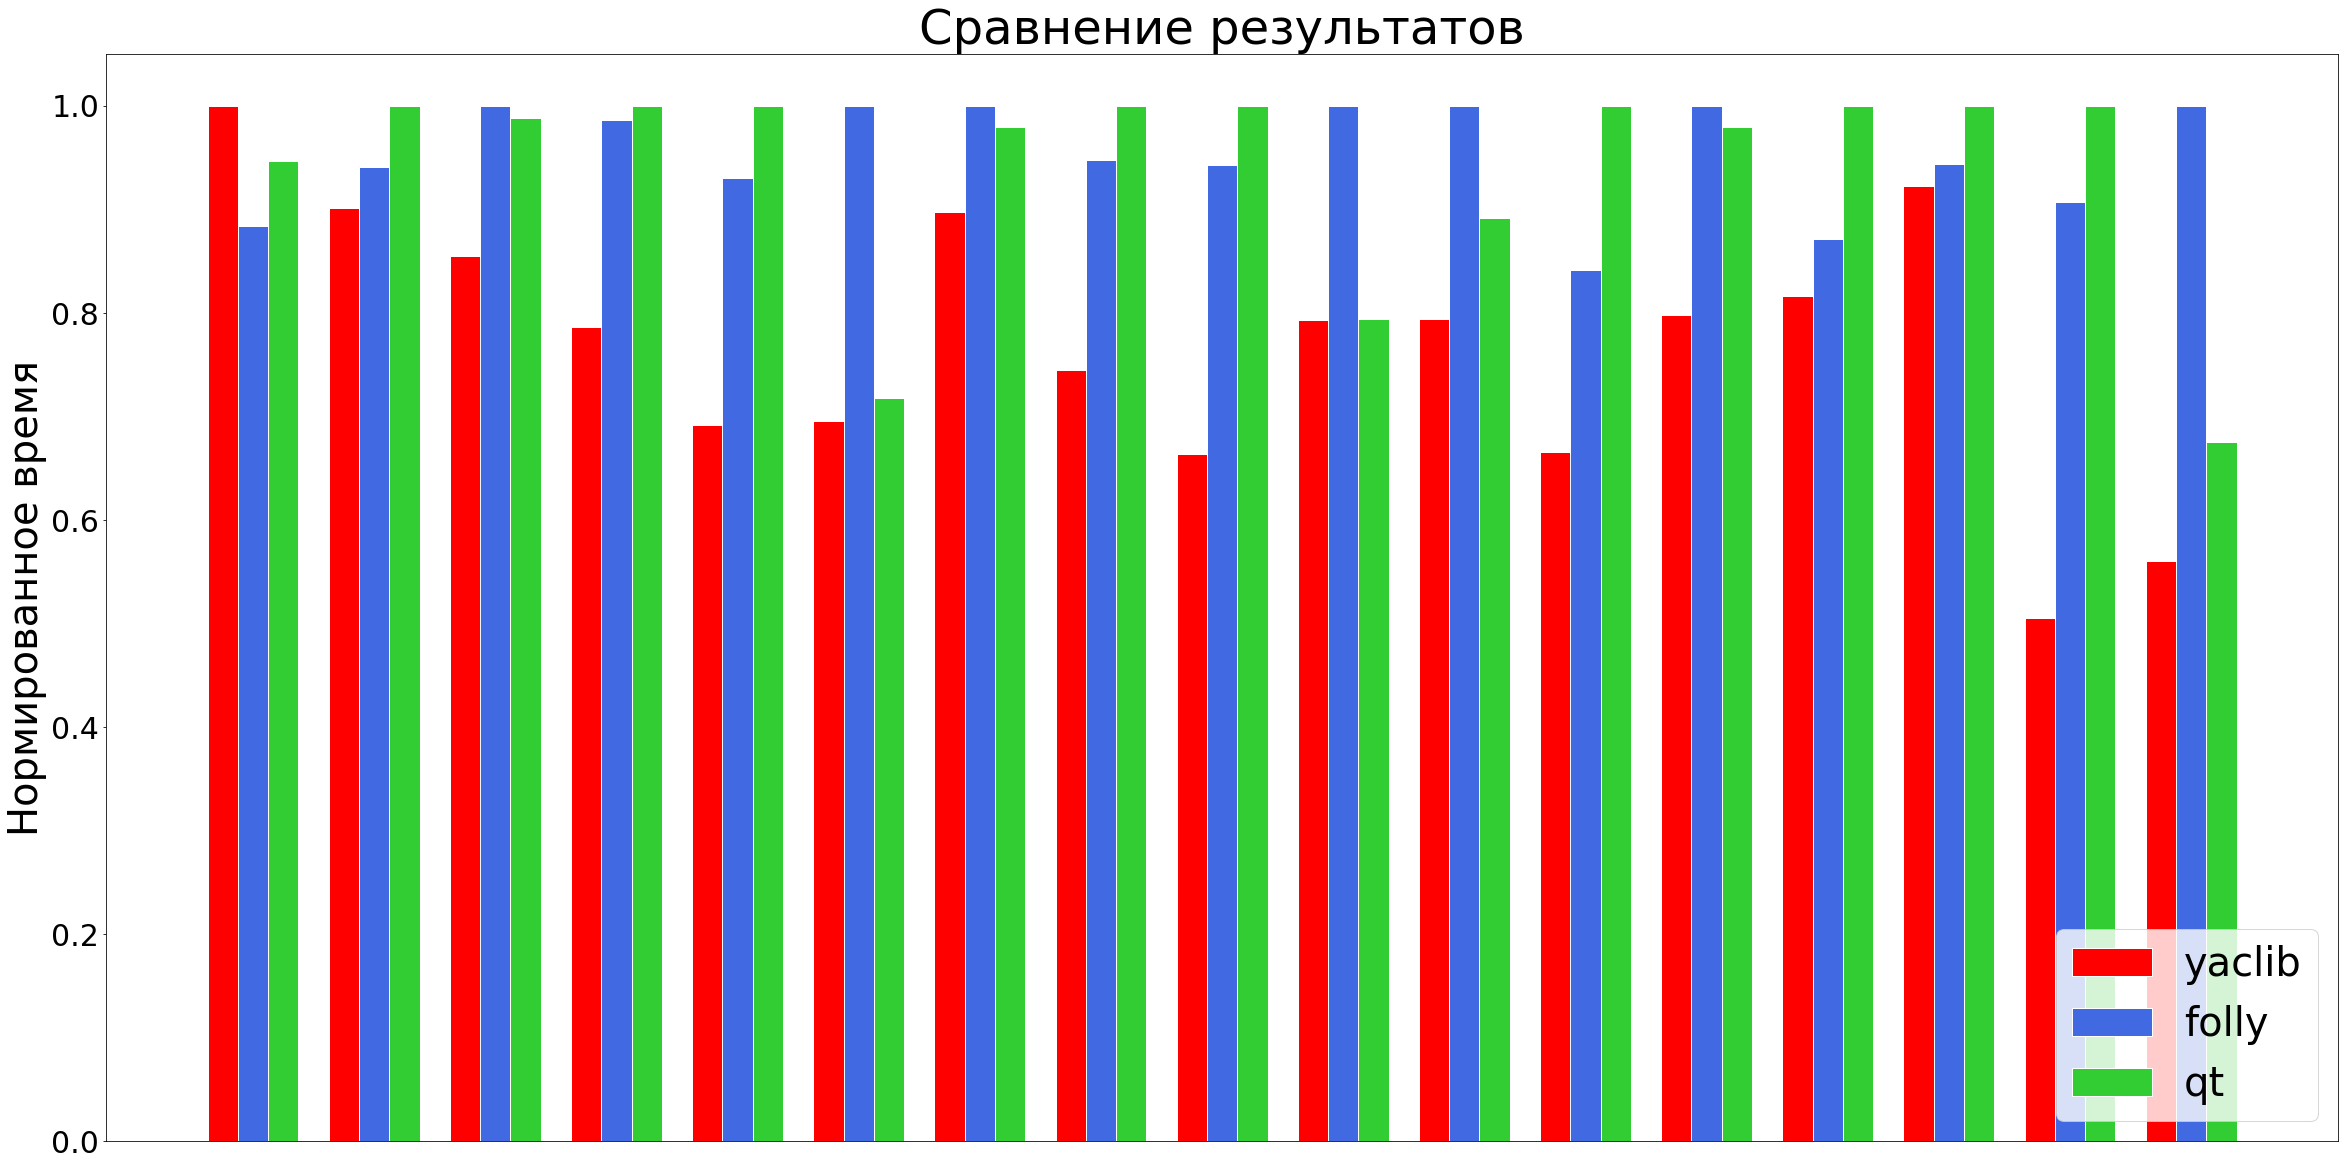

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# make data:
x_max = max(map(len, rows.values()))

x = np.arange(0, x_max * 4, 4)
y0 = rows['stl']
y = rows['yaclib']
y2 = rows['folly']
y3 = rows['qt']

for i in range(len(y)):
    max_el = max(y[i], y2[i], y3[i])
    y[i] /= max_el
    y2[i] /= max_el
    y3[i] /= max_el

rows['yaclib'] = y
rows['folly'] = y2
rows['qt'] = y3

min_el = min(min(y), min(y2), min(y3))

    
width = 1

fig, ax = plt.subplots(figsize=(40, 20))

ax.bar(x, y, width, edgecolor="white", linewidth=1, label='yaclib', color='r')
ax.bar(x + width, y2, width, edgecolor="white", linewidth=1, label = 'folly', color='royalblue')
ax.bar(x + 2* width, y3, width, edgecolor="white", linewidth=1, label='qt', color='limegreen')

ax.set(xticks=np.arange(0, 0))
ax.set_title('Сравнение результатов', fontsize='48')
ax.set_ylabel("Нормированное время", fontsize='40')
ax.tick_params(direction='out', labelsize='30')
ax.legend(prop={'size': 40}, loc='lower right')

plt.show()
fig.savefig('results.png', dpi=100)

In [70]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, legend_prop=None):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), prop=legend_prop)

In [48]:
def norm(data):
    data = {
        "a": [1, 2, 3, 2, 1],
        "b": [2, 3, 4, 3, 1],
        "c": [3, 2, 1, 4, 2],
        "d": [5, 9, 2, 1, 8],
        "e": [1, 3, 2, 2, 3],
        "f": [4, 3, 1, 1, 4],
    }
    
    return data

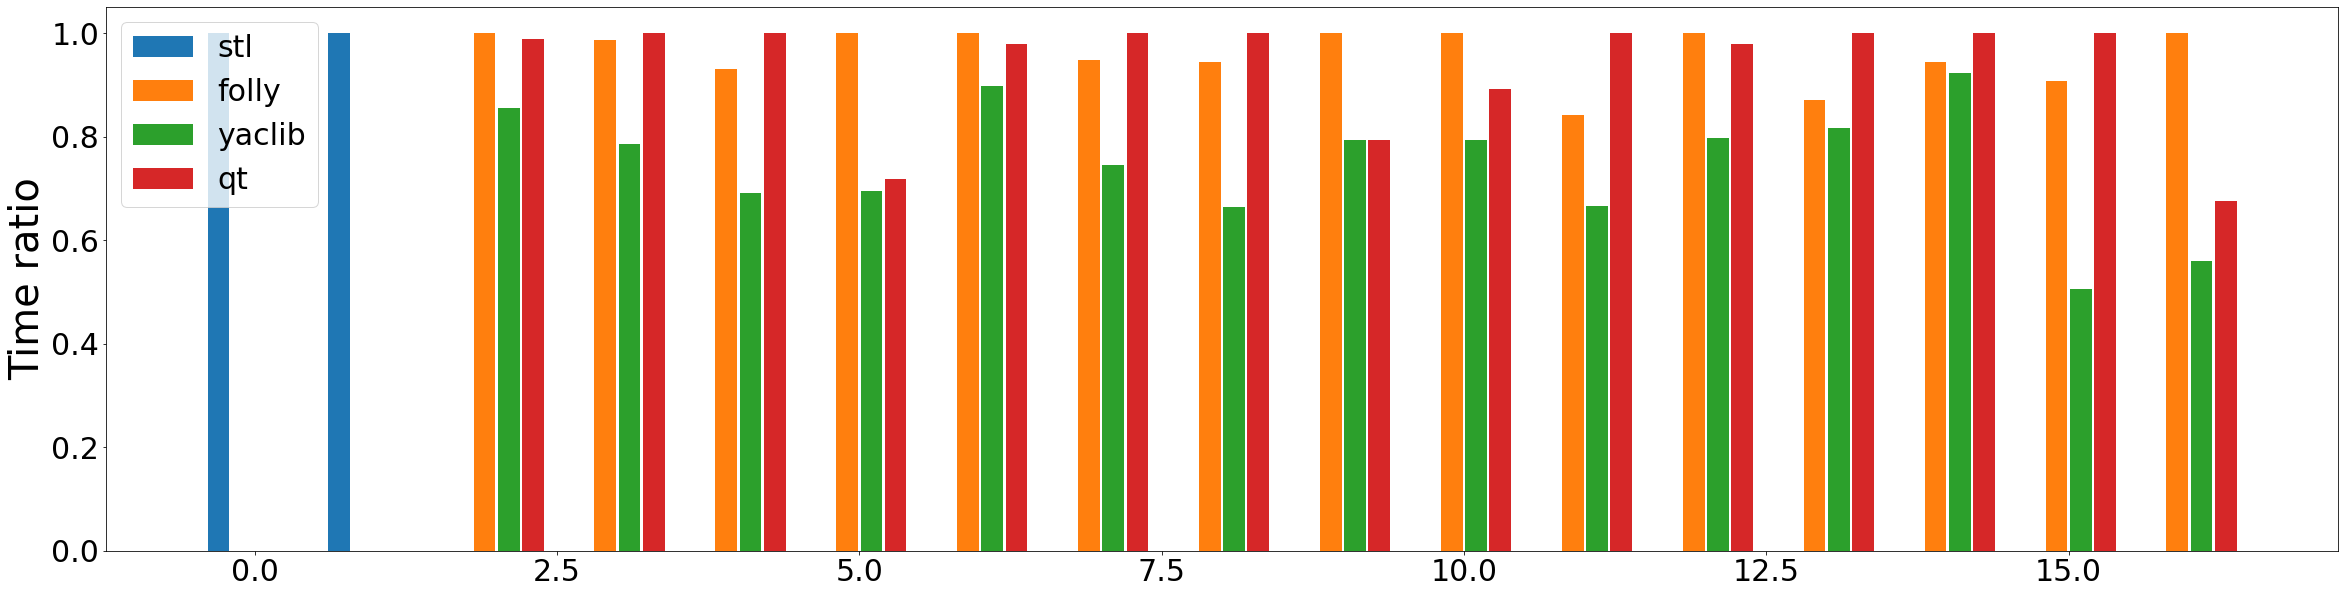

In [71]:
if __name__ == "__main__":    
    fig, ax = plt.subplots(figsize=(40, 10))
    bar_plot(ax, rows, total_width=.8, single_width=.9, legend_prop={'size': 30})
    ax.set_ylabel("Time ratio", fontsize='40')
    ax.tick_params(direction='out', labelsize='30')
    plt.show()